In [1]:
import matplotlib.pyplot as plt
import numpy as np


from aart_func import *
import params
from params import * # The file params.py contains all the relevant parameters for the simulations
from astropy import units as u
import kgeo
import image_tools as tls
import subprocess
import scipy.interpolate
from scipy.interpolate import interp1d
import fileloading
import bigRunComputing
from matplotlib import ticker
from matplotlib.lines import Line2D

%load_ext autoreload
%autoreload 2
import importlib 
from functools import partial
import astroModels
import runDataClass
import classRunComputing
import subprocess
from matplotlib.patches import Circle
import kgeo
import numpy as np
from matplotlib import ticker


import EZPaths
import os

import astroPloting
import image_tools
from aart_func import *
from image_tools import curve_params
from params import *
import importlib
import params
import astroModels
import fileloading
from movieMakerV2 import movieMakerIntensity
import normalizingBrightparams
from astropy import units as u
import re

from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from movieMakerV2 import intensityBlurr

Welcome to eht-imaging! v 1.2.7 



/home/td6241/anaconda3/envs/mural/lib/python3.12/site-packages/kgeo-0.0.1-py3.12.egg/kgeo/bfields.py:158: SyntaxWarning: invalid escape sequence '\m'
/home/td6241/anaconda3/envs/mural/lib/python3.12/site-packages/kgeo-0.0.1-py3.12.egg/kgeo/bfields.py:183: SyntaxWarning: invalid escape sequence '\m'
/home/td6241/anaconda3/envs/mural/lib/python3.12/site-packages/kgeo-0.0.1-py3.12.egg/kgeo/bfields.py:158: SyntaxWarning: invalid escape sequence '\m'
/home/td6241/anaconda3/envs/mural/lib/python3.12/site-packages/kgeo-0.0.1-py3.12.egg/kgeo/bfields.py:183: SyntaxWarning: invalid escape sequence '\m'


In [3]:
plt.rcParams.update({
    'font.size': 14,  # Set font size to 11pt
    'axes.labelsize': 14,  # -> axis labels
    'legend.fontsize': 12,  # -> legends
    'text.usetex': True,
    'text.latex.preamble': (  # LaTeX preamble
        r'\usepackage{lmodern}'
    ),
    'font.family': 'Latin Modern Roman',
})

In [4]:
run2 = runDataClass.run2

bigRun2 = classRunComputing.BigRuns(
    run2.getRunName(),
    run2.getBrightparams(),
    run2.getBPVarNames(),
    run2.getGeoGrid(),
    run2.getGeoGridNames(),
    normalized_brightparams=run2.getIsNormalized(),
)

# ModelA32 = runDataClass.SingleModelData(bigRun2.getSubPaths(),run2.getRunName(),"ModelA_32")

Subdirectory for storing all run results '/scratch/gpfs/td6241/aart/bigRuns/' already exist, doing nothing
Subdirectory for storing this run result '/scratch/gpfs/td6241/aart/bigRuns/run2/' already exist, doing nothing
Subdirectory for images '/scratch/gpfs/td6241/aart/bigRuns/run2/Images/' already exist, doing nothing
Subdirectory for data '/scratch/gpfs/td6241/aart/bigRuns/run2/Data/' already exist, doing nothing
Subdirectory for inter model data '/scratch/gpfs/td6241/aart/bigRuns/run2/InterModel/' already exist, doing nothing
Subdirectory for  '/scratch/gpfs/td6241/aart/bigRuns/run2/Data/geo/' already exist, doing nothing
Subdirectory for  '/scratch/gpfs/td6241/aart/bigRuns/run2/Data/intensity/' already exist, doing nothing
Subdirectory for  '/scratch/gpfs/td6241/aart/bigRuns/run2/Data/numpy/' already exist, doing nothing
Subdirectory for  '/scratch/gpfs/td6241/aart/bigRuns/run2/Images/fluxVNu/' already exist, doing nothing
Subdirectory for  '/scratch/gpfs/td6241/aart/bigRuns/run2/I

In [5]:

plt.rcParams.update({
    'font.size' : 14,                   # Set font size to 11pt
    'axes.labelsize': 14,               # -> axis labels
    'legend.fontsize': 12,              # -> legends
    'text.usetex': True,
    'text.latex.preamble': (            # LaTeX preamble
        r'\usepackage{lmodern}'
    ),
    'font.family': 'Latin Modern Roman',
})
n0_color = "#d55e00"
n1_color = "#0072b2"
n2_color = "#009e73"
cumu_color = "#cc79a7"


RingStyle ={
    "label": ['n=0','n=1','n=2','total'],
    "color": [n0_color,n1_color,n2_color,cumu_color],
    "linewidth": [3,3,3,4]
}
line_styles = {
    "lab_frame": "-",
    "rest_frame": "--",
    "thick":"-",
    "thin":"--"
}
xTickParams = {
    'length':15,
    'width': 1,
    'labelrotation': 0,
    'which':'major'
}

action = {
    "var": "nu0",
    "start": 10e9,
    "stop": 700e9,
    "step": 20e9,
    "images": True
}

conv_1_style = {
    "color": 'dimgrey',
    "linestyle": "-",
    "linewidth": 1
}
flux_peak_style = {
    "color": 'k',
    "linestyle": "-.",
    "linewidth": 2
}

r_outer_style = {
    "color": 'dimgrey',
    "linestyle": "-",
    "linewidth": 7
}

In [ ]:
bigRun2['ModelC22'].keys()

dict_keys(['model', 'lband', 'rband', 'loadGeo', 'cintent_data', 'pintent_data', 'bp', 'hname', 'hname_list', 'hname_plot', 'np', 'rprofs', 'flux_peak', 'conv', 'cfreq_list'])

In [21]:
bigRun2['ModelC22']['np'].keys()

dict_keys(['jansky_thick', 'jansky_thin', 'radVnu_thick', 'radVnu_thin', 'xvar'])

In [70]:
current_geo_model = fileloading.totalModelNametoGridModel("ModelC22",bigRun2.run_type)
fileloading.loadGeoModel(current_geo_model, run2.getRunName())


Loading ModelC

file /scratch/gpfs/td6241/aart/bigRuns/run2/geoModels/ModelC.py Loaded as /home/td6241/repo/aart/params.py


In [71]:
# IS THIS ONLY DEPENDEND ON SPIN AND INC?
a = params.spin_case

inc = params.i_case * np.pi / 180  # inclination angle
rh = 1 + np.sqrt(1 - a ** 2)  # event horizon
# angles to sample
varphis = np.linspace(-180, 179, 360) * np.pi / 180

# generate inner shadow (n=0) curve with kgeo
data_inner = kgeo.equatorial_lensing.rho_of_req(a, inc, rh, mbar=0, varphis=varphis)
(_, rhos_inner, alphas_inner, betas_inner) = data_inner

r_inner = image_tools.curve_params(varphis, rhos_inner)

# generate outer shadow (n=inf) curve with kgeo
data_outer = kgeo.equatorial_lensing.rho_of_req(a, inc, rh, mbar=5, varphis=varphis)
(_, rhos_outer, alphas_outer, betas_outer) = data_outer

r_outer = image_tools.curve_params(varphis, rhos_outer)


In [86]:
current_geo_model = fileloading.totalModelNametoGridModel("ModelC22",bigRun2.run_type)

lband = bigRun2.sub_paths["GeoDoth5Path"] + current_geo_model + "Lensing" + ".h5"
rtray = bigRun2.sub_paths["GeoDoth5Path"] + current_geo_model + "RayTracing" + ".h5"


print("Reading file: ",lband)

h5f = h5py.File(lband,'r')

#Points for the boundary of the BH shadow
alpha_critc=h5f['alpha'][:]
beta_critc=h5f['beta'][:]

#The concave hulls for the lensing bands
hull_0i=h5f['hull_0i'][:]
hull_0e=h5f['hull_0e'][:]
hull_1i=h5f['hull_1i'][:]
hull_1e=h5f['hull_1e'][:]
hull_2i=h5f['hull_2i'][:]
hull_2e=h5f['hull_2e'][:]

#The grid points for each lensing band
supergrid0=h5f['grid0'][:]
N0=int(h5f["N0"][0])
mask0=h5f['mask0'][:]
lim0=int(h5f["lim0"][0])
supergrid1=h5f['grid1'][:]
N1=int(h5f["N1"][0])
mask1=h5f['mask1'][:]
lim1=int(h5f["lim1"][0])
supergrid2=h5f['grid2'][:]
N2=int(h5f["N2"][0])
mask2=h5f['mask2'][:]
lim2=int(h5f["lim2"][0])

h5f.close()


Reading file:  /scratch/gpfs/td6241/aart/bigRuns/run2/Data/geo/ModelCLensing.h5


# Power Laws

In [22]:
powerLawColors = {
    'shallow':'tab:red',
    'fiducial':'tab:orange',
    'steeper': 'tab:blue'
}

In [56]:
shallowp = bigRun2.getRadialProfiles('ModelC23',rrange=(np.log10(2),np.log10(20)),num_of_points=100,scale='log')
fiducialp = bigRun2.getRadialProfiles('ModelC22',rrange=(np.log10(2),np.log10(20)),num_of_points=100,scale='log')
steeperp = bigRun2.getRadialProfiles('ModelC21',rrange=(np.log10(2),np.log10(20)),num_of_points=100,scale='log')

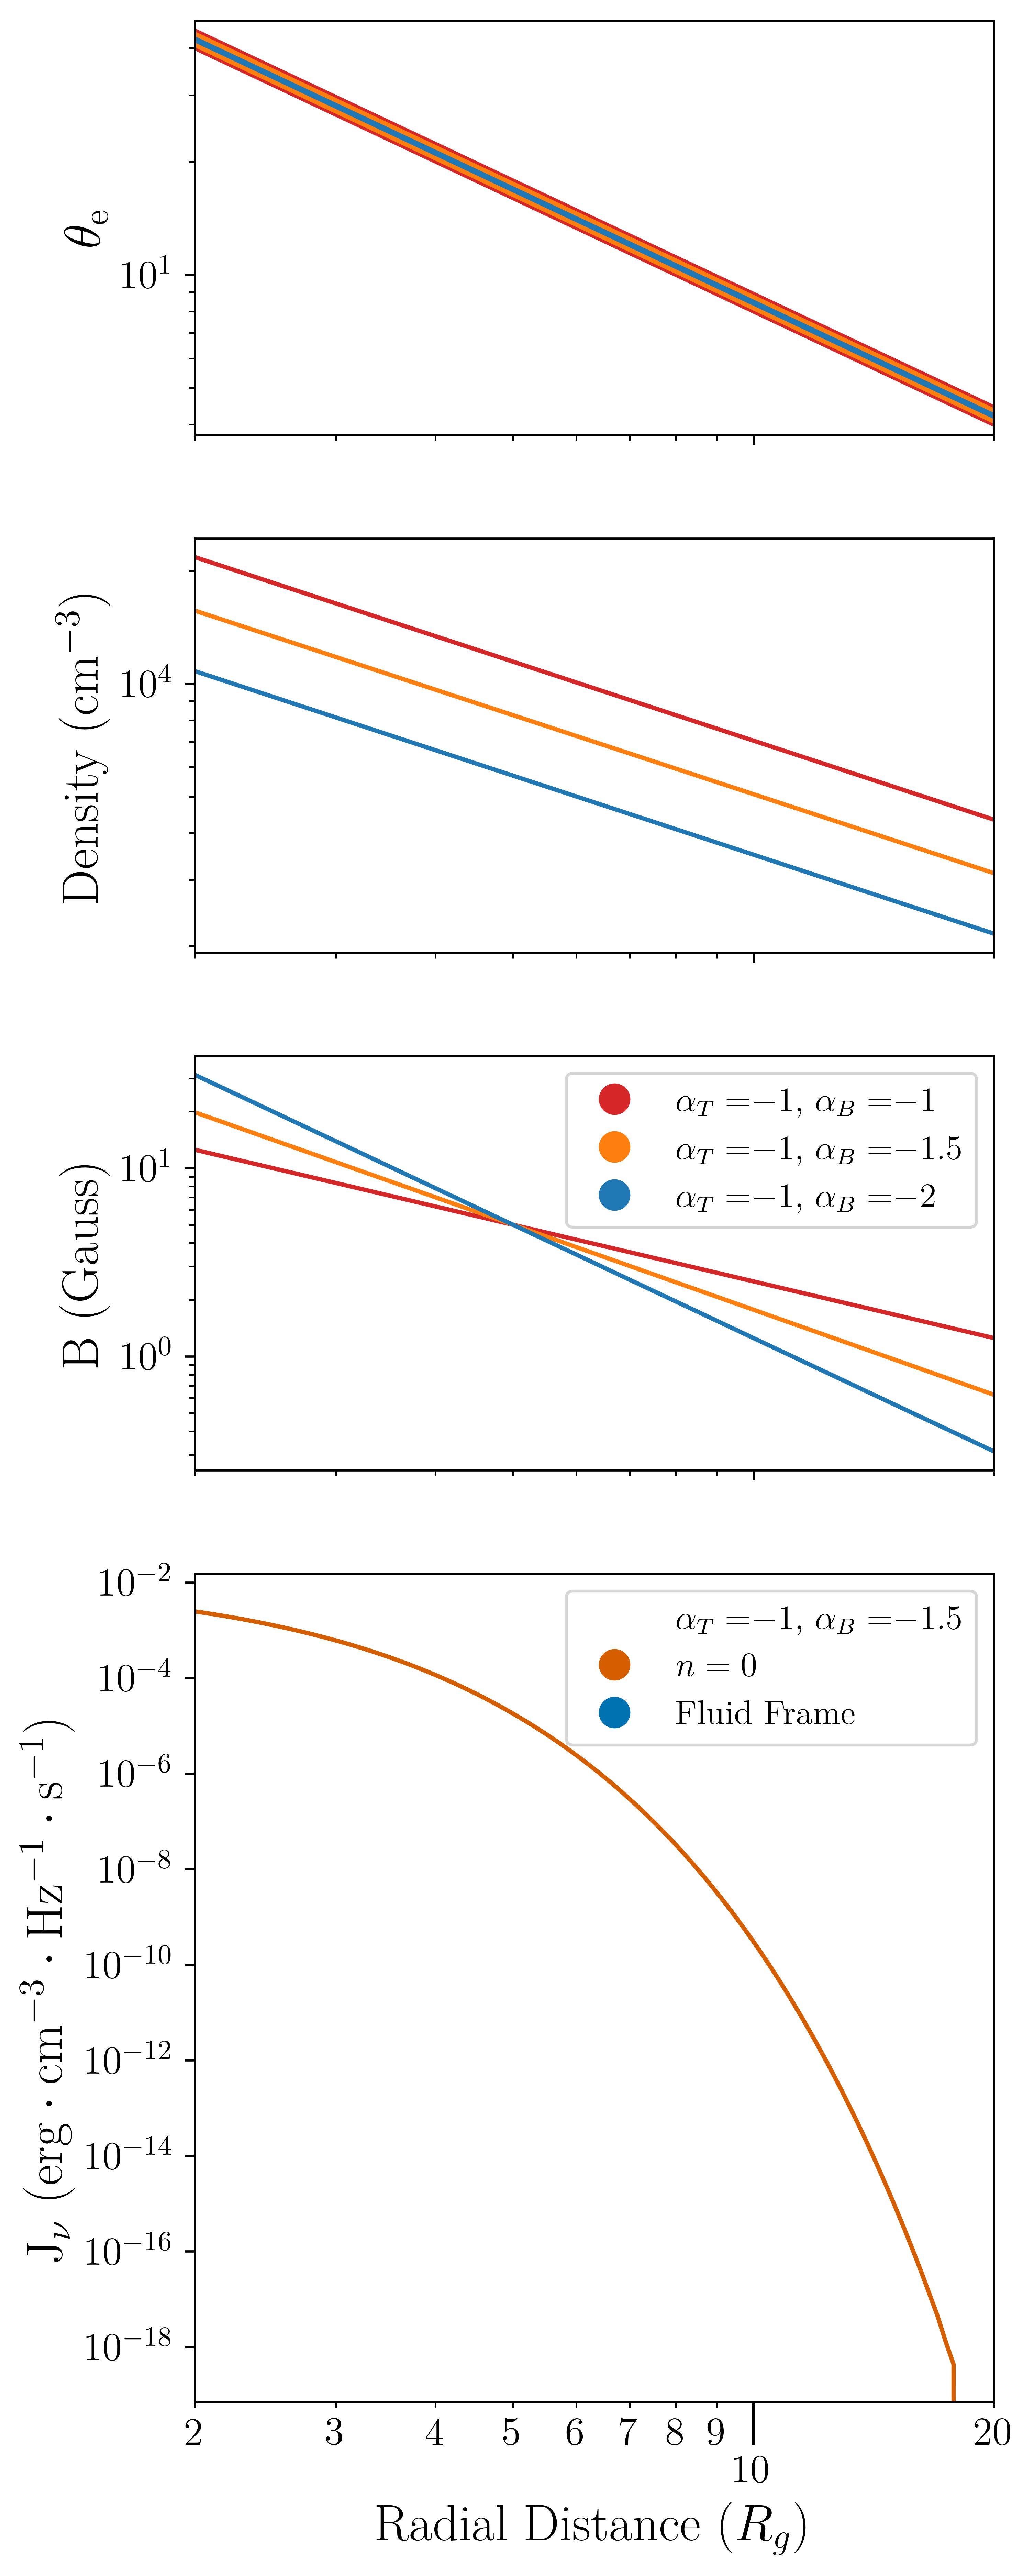

In [57]:
fig = plt.subplots(4,1, sharex='col', figsize=(5,15), dpi=600, height_ratios=[1,1,1,2])
ax = [None, None, None, None]

i=0
n=70000

# Subplot 1-----------------------------------------
ax[0] = plt.subplot(4,1,1)
ax[0].plot(shallowp['r'],shallowp["theta_e"], powerLawColors['shallow'], linewidth=7)
ax[0].plot(fiducialp['r'],fiducialp["theta_e"], powerLawColors['fiducial'], linewidth=5)
ax[0].plot(steeperp['r'],steeperp["theta_e"], powerLawColors['steeper'], linewidth=2)

ax[0].set_ylabel(R'$\rm \theta_e$', fontsize=18)
ax[0].set_yscale('log')

# Subplot 2-----------------------------------------
ax[1] = plt.subplot(4,1,2)
ax[1].plot(shallowp['r'],shallowp["nth"], powerLawColors['shallow'])
ax[1].plot(fiducialp['r'],fiducialp["nth"], powerLawColors['fiducial'])
ax[1].plot(steeperp['r'],steeperp["nth"], powerLawColors['steeper'])

ax[1].set_ylabel('Density ({})'.format(R'$\rm cm^{-3}$'), fontsize=18)
ax[1].set_yscale('log')

# Subplot 3-----------------------------------------
ax[2] = plt.subplot(4,1,3)


ax[2].plot(shallowp['r'],shallowp["b"], powerLawColors['shallow'])
ax[2].plot(fiducialp['r'],fiducialp["b"], powerLawColors['fiducial'])
ax[2].plot(steeperp['r'],steeperp["b"], powerLawColors['steeper'])

ax[2].set_yscale('log')
ax[2].set_ylabel('B (Gauss)', fontsize=18)

Legendlines = [
    Line2D([0],[0],marker='o', markerfacecolor=powerLawColors['shallow'], color='w', markersize=12),
    Line2D([0],[0],marker='o', markerfacecolor=powerLawColors['fiducial'], color='w', markersize=12),
    Line2D([0],[0],marker='o', markerfacecolor=powerLawColors['steeper'], color='w', markersize=12),
    # Line2D([0],[0],marker='o', markerfacecolor=ringColors[3], color='w', markersize=12),
]

Legendlabels = [
    R"$\alpha_T=$" + R"${}$".format(str(bigRun2['ModelC23']['bp']["p_temp"])) + R", $\alpha_B=$" + R"${}$".format(str(bigRun2['ModelC23']['bp']["p_mag"])),
    R"$\alpha_T=$" + R"${}$".format(str(bigRun2['ModelC22']['bp']["p_temp"])) + R", $\alpha_B=$" + R"${}$".format(str(bigRun2['ModelC22']['bp']["p_mag"])),
    R"$\alpha_T=$" + R"${}$".format(str(bigRun2['ModelC21']['bp']["p_temp"])) + R", $\alpha_B=$" + R"${}$".format(str(bigRun2['ModelC21']['bp']["p_mag"]))
    # "Total",
          ]


ax[2].legend(Legendlines,Legendlabels)

# Subplot 4-----------------------------------------
ax[3] = plt.subplot(4,1,4)


ax[3].plot(fiducialp['r'], fiducialp['si_thick'], color=RingStyle["color"][0],linestyle=line_styles["lab_frame"])
# ax[3].plot(r_variable["rest"], jcoef["rest"], color=RingStyle["color"][1],linestyle='-')
# ax[3].plot(r_variable["n2"], jcoef["n2"], color=RingStyle["color"][2],linestyle=line_styles["lab_frame"])


# ax[3].plot(bp0s["bp_shallowT86"][0,i::n], bp0s["bp_shallowT86"][7,i::n], 'tab:red',linewidth=3, label="Model 3",linestyle=(0, (1, 5)))
# ax[3].plot(bp0s["bp_fiducial86"][0,i::n], bp0s["bp_fiducial86"][7,i::n], 'tab:orange',linewidth=3,label="Model 1",linestyle=(0, (1, 5)))
# ax[3].plot(bp0s["bp_steeperT86"][0,i::n], bp0s["bp_steeperT86"][7,i::n], 'tab:blue',linewidth=3, label="Model 2",linestyle=(0, (1, 5)))


# ax[3].plot(bp0s["bp_shallowT345"][0,i::n], bp0s["bp_shallowT345"][7,i::n], 'tab:red', label="Model 3",linestyle='-.')
# ax[3].plot(bp0s["bp_fiducial345"][0,i::n], bp0s["bp_fiducial345"][7,i::n], 'tab:orange',label="Model 1",linestyle='-.')
# ax[3].plot(bp0s["bp_steeperT345"][0,i::n], bp0s["bp_steeperT345"][7,i::n], 'tab:blue', label="Model 2",linestyle='-.')


ax[3].set_ylabel(R'$\rm J_\nu$ ($\rm erg \cdot cm^{-3} \cdot Hz^{-1} \cdot s^{-1}$)', fontsize=18)
ax[3].set_yscale('log')
ax[3].set_xscale('log')
ax[3].minorticks_on()
ax[3].xaxis.set_major_formatter(ticker.FormatStrFormatter("%.0f"))
ax[3].xaxis.set_minor_formatter(ticker.FormatStrFormatter('%.0f'))
ax[3].set_xlabel('Radial Distance ({})'.format(R'$R_g$'), fontsize=18 )
ax[3].set_xlim([2,20])


Legendlines = [
    Line2D([0],[0],linestyle='-', markerfacecolor='k', color='w', markersize=12),
    Line2D([0],[0],marker='o', markerfacecolor=RingStyle["color"][0], color='w', markersize=12),
    Line2D([0],[0],marker='o', markerfacecolor=RingStyle["color"][1], color='w', markersize=12),
    # Line2D([0],[0],marker='o', markerfacecolor=RingStyle["color"][2], color='w', markersize=12),

    ]
Legendlabels = [
    R"$\alpha_T=$" + R"${}$".format(str(bigRun2['ModelC22']['bp']["p_temp"])) + R", $\alpha_B=$" + R"${}$".format(str(bigRun2['ModelC22']['bp']["p_mag"])),
    R"$n=0$",
    "Fluid Frame",
    # R"$n=2$",

          ]


ax[3].legend(Legendlines,Legendlabels)
# ax[3].set_ylim([2e-27, 1e-17])
ax[3].tick_params('x', 
                  length=xTickParams["length"], 
                  width=xTickParams["width"], 
                  which=xTickParams["which"], 
                  labelrotation=xTickParams["labelrotation"])


# plt.savefig(fig_home + "emission_profiles.png", dpi=600, bbox_inches='tight')

# Flux Versus Observation Freq

In [27]:
RingStyle["linewidth"]=[3,3,3,2]

In [28]:
def createFluxRadiiGraph(ax,xaxis,janksys_thin,janksys_thick,fiducial_thin=None,fiducial_thick=None):

    ax.plot(xaxis, janksys_thin[:, 0], '-', label='n=0', color='tab:red', linewidth=3)
    janksky_line_style ={
        "label": ['n=0','n=1','n=2','total'],
        "color": [n0_color,n1_color,n2_color,cumu_color],
        "linewidth": [3,3,3,4]
    }

    amount_to_plot = 4
    

    if fiducial_thin is not None:
        for i in (range(amount_to_plot)):
            ax.plot(xaxis, 
                    fiducial_thin[:, i], 
                    line_styles["thin"],
                    label=RingStyle["label"][i], 
                    color=RingStyle["color"][i],
                    linewidth=RingStyle["linewidth"][i],
                    alpha=0.3)

            ax.plot(xaxis, fiducial_thick[:, i], 
                    line_styles["thick"],
                    label=RingStyle["label"][i], 
                    color=RingStyle["color"][i],
                    linewidth=RingStyle["linewidth"][i],
                    alpha=0.3)
            
    for i in (range(amount_to_plot)):
        ax.plot(xaxis, 
                janksys_thin[:, i], 
                line_styles["thin"],
                label=RingStyle["label"][i], 
                color=RingStyle["color"][i],
                linewidth=RingStyle["linewidth"][i])

        ax.plot(xaxis, 
                janksys_thick[:, i], 
                line_styles["thick"],
                label=RingStyle["label"][i], 
                color=RingStyle["color"][i],
                linewidth=RingStyle["linewidth"][i])
        


    # ax.axvline(poi["flux_peak_thin"], color=flux_peak_style["color"],
    #            linestyle=flux_peak_style["linestyle"], linewidth=flux_peak_style["linewidth"])

    # Labels

    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.xaxis.set_minor_formatter(ticker.FormatStrFormatter('%.0f'))
    ax.xaxis.set_major_formatter(ticker.FormatStrFormatter("%.0f"))
    # ax.yaxis.set_minor_formatter(ticker.FormatStrFormatter('%.1f'))
    # ax.yaxis.set_major_formatter(ticker.FormatStrFormatter("%.1f"))
    # ax1.yaxis.set_minor_formatter(ticker.FormatStrFormatter('%.4f'))
    # ax.yaxis.set_major_formatter(ticker.FormatStrFormatter("%.0e"))

    ax.tick_params('x', which="both", labelbottom=False)
    ax.tick_params('y', which="both", labelleft=False)

    n = 4  # Keeps every 4th label
    [l.set_visible(False) for (i, l) in enumerate(ax.xaxis.get_minorticklabels()) if i % n != 0]
    ax.tick_params('both', length=10, width=1, which='major')
    ax.set_xlim(xaxis[0], xaxis[xaxis.size - 1])
    ax.set_ylim(10e-5, 10e1)
    # ax.legend(loc='upper right')

    new_ticks = [xaxis[0], 230, xaxis[xaxis.size - 1]]
    ax.set_xticks(new_ticks)
    


    # ax.legend(Legendlines,Legendlabels)
    # ax.tick_params('x', length=10, width=1, which='major', labelrotation=90)


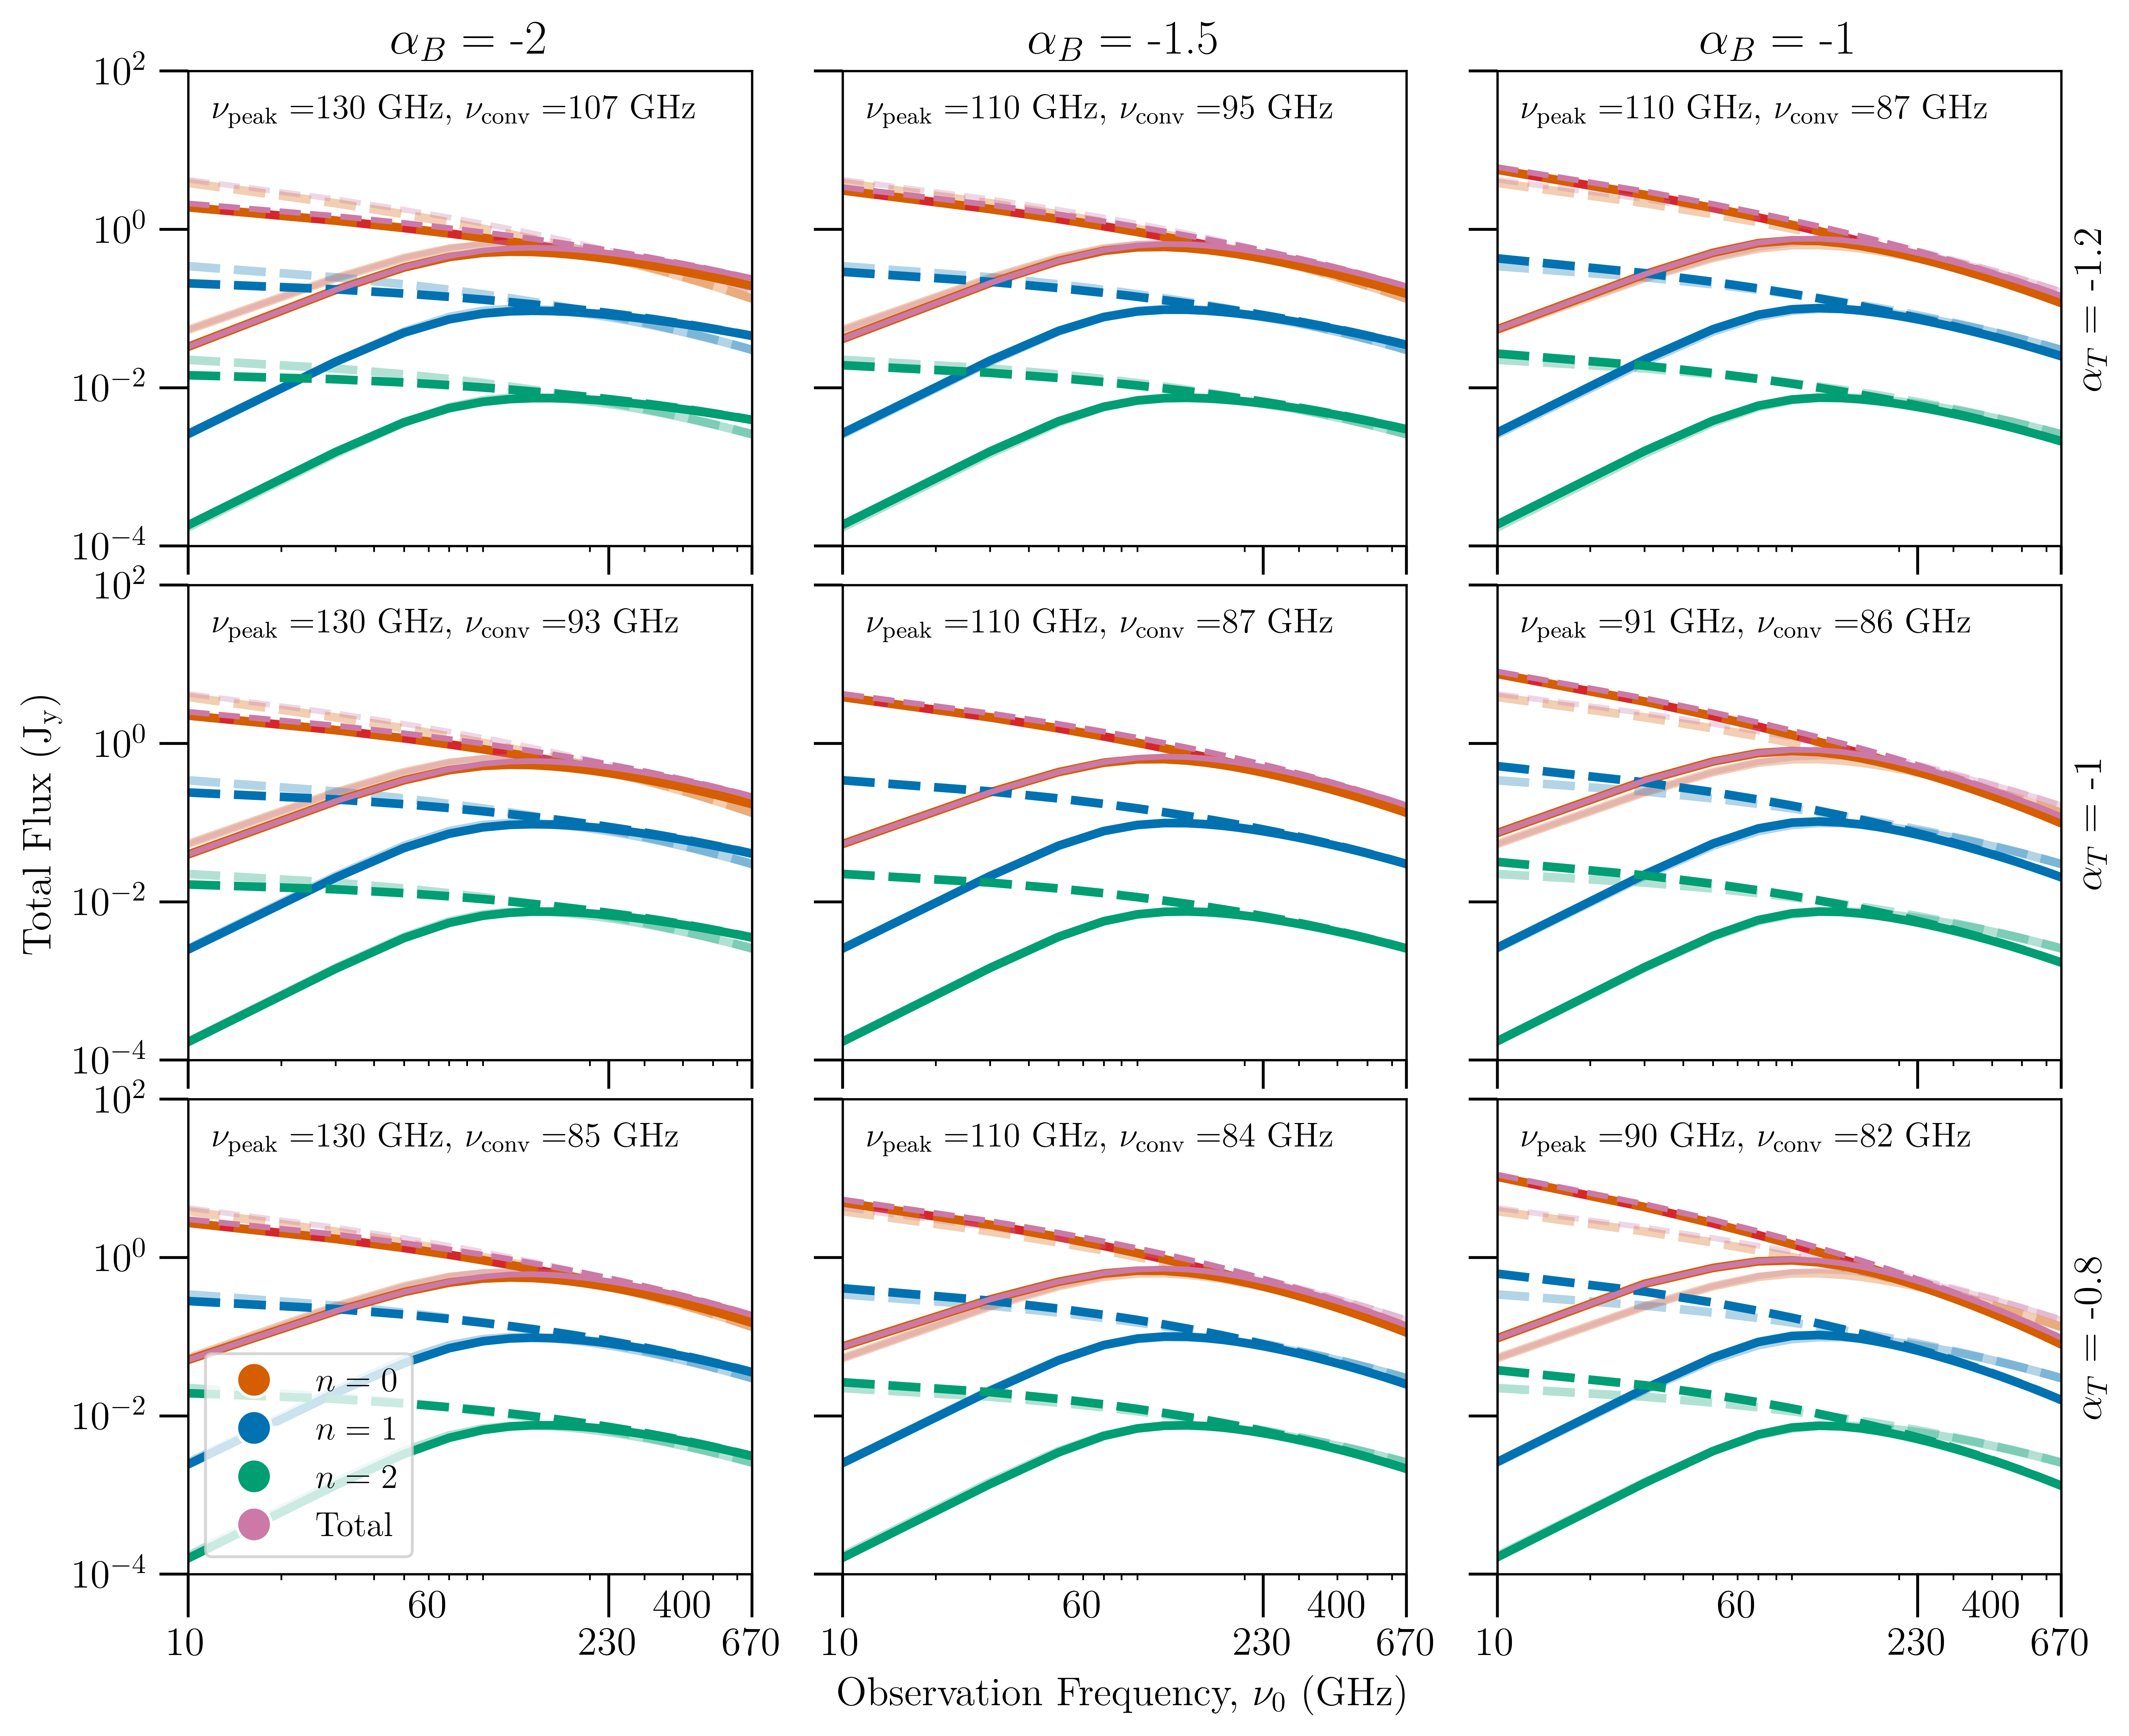

In [55]:

fig, ax = plt.subplots(3, 3, figsize=[10,8], dpi=600,sharex="col",sharey="row")
ax = np.array([[None, None, None],[None, None, None],[None, None, None]])
fig.tight_layout(h_pad=0.08,w_pad=1)

ploty = [1,4,7]
plotx = [7,8,9]

alphaBlabel = [1,2,3]
alphaTlabel = [3,6,9]

k = 1
fiducial_thin=bigRun2[2,1,1]['np']['jansky_thin']()
fiducial_thick=bigRun2[2,1,1]['np']['jansky_thick']()
for i in range(3):
    for j in range(3):
        # xaxis = np.array(model_list[i,j]["x_variable"]) / astroModels.scale_label["nu0"]
        # janksys_thin = model_list[i,j]["janksys_thin"]
        # janksys_thick = model_list[i,j]["janksys_thick"]
        #         xaxis = np.array(model_list[i,j]["x_variable"]) / astroModels.scale_label["nu0"]
        # janksys_thin = model_list[i,j]["janksys_thin"]
        # janksys_thick = model_list[i,j]["janksys_thick"]


        ax[i,j] = plt.subplot(3,3,k)
        createFluxRadiiGraph(
            ax[i,j],
            bigRun2[2,i,j]['np']['xvar']() / 1e9,
            bigRun2[2,i,j]['np']['jansky_thin'](),
            bigRun2[2,i,j]['np']['jansky_thick'](),
            fiducial_thin,
            fiducial_thick)
        
#         flux_peak = (action["start"] + action["step"] * np.argmax(janksys_thick[i, j]))/ astroModels.scale_label[action['var']]
# #         conv_1 = (action["start"] + action["step"] * ilp.ring_convergance(mean_radii_Thick[i,j][:, 2], mean_radii_Thick[i,j][:, 3],3)) / astroModels.scale_label[action['var']]
        
#         conv_1 = action["start"] + action["step"] * ilp.ring_convergance(mean_radii_Thick[i,j][:, 2], mean_radii_Thick[i,j][:, 3],3)
#         conv_1 = conv_1 / astroModels.scale_label[action['var']]
        
#         print(conv_1)
        
        text = R"$\nu_{\rm peak}=$" + str("{:.0f}".format(bigRun2[2,i,j]['flux_peak'](3)/1e9)) + ' ' + astroModels.units_label["nu0"]  + R", $\nu_{\rm conv}=$" + str("{:.0f}".format(bigRun2[2,i,j]['conv']/1e9)) + ' ' + astroModels.units_label["nu0"]
        ax[i,j].text(12, 25, text , fontsize=12, color="k")
        
        if k == 7:
            
            Legendlines = [
                Line2D([0],[0],marker='o', markerfacecolor=RingStyle["color"][0], color='w', markersize=12),
                Line2D([0],[0],marker='o', markerfacecolor=RingStyle["color"][1], color='w', markersize=12),
                Line2D([0],[0],marker='o', markerfacecolor=RingStyle["color"][2], color='w', markersize=12),
                Line2D([0],[0],marker='o', markerfacecolor=RingStyle["color"][3], color='w', markersize=12),
            ]
            Legendlabels = [
                R"$n=0$",
                R"$n=1$",
                R"$n=2$",
                "Total",
                  ]

            ax[i,j].legend(Legendlines,Legendlabels)
            
        if k == 4:
            ax[i,j].set_ylabel("Total Flux ({})".format(R'$\rm J_y$'))
        
        if k == 8:
            ax[i,j].set_xlabel(R"Observation Frequency, $\nu_0$ (GHz)")
            
        if k in ploty:
            ax[i,j].tick_params('y', which="both", labelleft=True)
        
        if k in plotx:
            ax[i,j].tick_params('x', which="both", labelbottom=True)
            
            
            n = 6  # Keeps every 4th label
            [l.set_visible(False) for (i, l) in enumerate(ax[i,j].xaxis.get_minorticklabels()) if i % n != 0]
            ax[i,j].tick_params('x', 
                  length=xTickParams["length"], 
                  width=xTickParams["width"], 
                  which=xTickParams["which"], 
                  labelrotation=xTickParams["labelrotation"])
            
        if k in alphaBlabel:
            ax[i,j].title.set_text(R'$\alpha_B=$ ' + str(bigRun2[2,i,j]['bp']["p_mag"]))
            
        if k in alphaTlabel:
            ax[i,j].set_ylabel(R'$\alpha_T=$ ' + str(bigRun2[2,i,j]['bp']["p_temp"]))
            ax[i,j].yaxis.set_label_position('right')
        k += 1
        
        
# plt.savefig(fig_home + "FluxVRadGrid",dpi=600,bbox_inches='tight')

# Radii Vs Observation freq

In [58]:
def radiiVersusFreq(ax,xaxis,mean_radii,conv_1=None,flux_peak=None,r_outer=None):
    
    if conv_1 is not None:
        ax.axvline(conv_1,
                   color=conv_1_style["color"], 
                   linestyle=conv_1_style["linestyle"], 
                   linewidth=conv_1_style["linewidth"]
                  )
    
    if flux_peak is not None:
        ax.axvline(flux_peak, color=flux_peak_style["color"], 
                   linestyle=flux_peak_style["linestyle"], 
                   linewidth=flux_peak_style["linewidth"]
                  )
    
    if r_outer is not None:
        ax.axhline(r_outer,
                   color=r_outer_style["color"],
                   linestyle=r_outer_style["linestyle"], 
                   linewidth=r_outer_style["linewidth"],
                   alpha=0.3
                  )


    amount_to_plot = 4

    for i in reversed(range(amount_to_plot)):
        ax.plot(xaxis, mean_radii[:, i],
                 "-", 
                 label=RingStyle["label"][i],
                 color=RingStyle["color"][i], 
                 linewidth=RingStyle["linewidth"][i])


    # Labels
    # ax.set_xlabel(astroModels.var_label["nu0"].replace('=', '')
    #                + ' (' + astroModels.units_label["nu0"] + ')')
    ax.set_xscale('log')
    ax.set_yscale('log')

    ax.xaxis.set_minor_formatter(ticker.FormatStrFormatter('%.0f'))
    ax.xaxis.set_major_formatter(ticker.FormatStrFormatter("%.0f"))
    ax.yaxis.set_minor_formatter(ticker.FormatStrFormatter('%.1f'))
    ax.yaxis.set_major_formatter(ticker.FormatStrFormatter("%.1f"))

    new_ticks = [xaxis[0], 230, xaxis[xaxis.size - 1]]
    ax.set_xticks(new_ticks)

    # new_ticks = np.append(ax1.get_yticks(), r_outer)
    # new_ticks = np.append(new_ticks, r_inner)
    # print(new_ticks)
    # ax1.set_yticks(new_ticks)
    n = 4  # Keeps every 4th label
    [l.set_visible(False) for (i, l) in enumerate(ax.xaxis.get_minorticklabels()) if i % n != 0]
    ax.set_xlim(xaxis[0], xaxis[xaxis.size - 1])

#     ax.set_ylim(0, 6)
    
    ax.tick_params('x', which="both", labelbottom=False)
    ax.tick_params('y', which="both", labelleft=False)



    # ax.tick_params('x', length=20, width=1, which='major', labelrotation=80)

In [59]:
bigRun2[2,i,j]['np'].keys()

dict_keys(['jansky_thick', 'jansky_thin', 'radVnu_thick', 'radVnu_thin', 'xvar'])

130240240240.24023

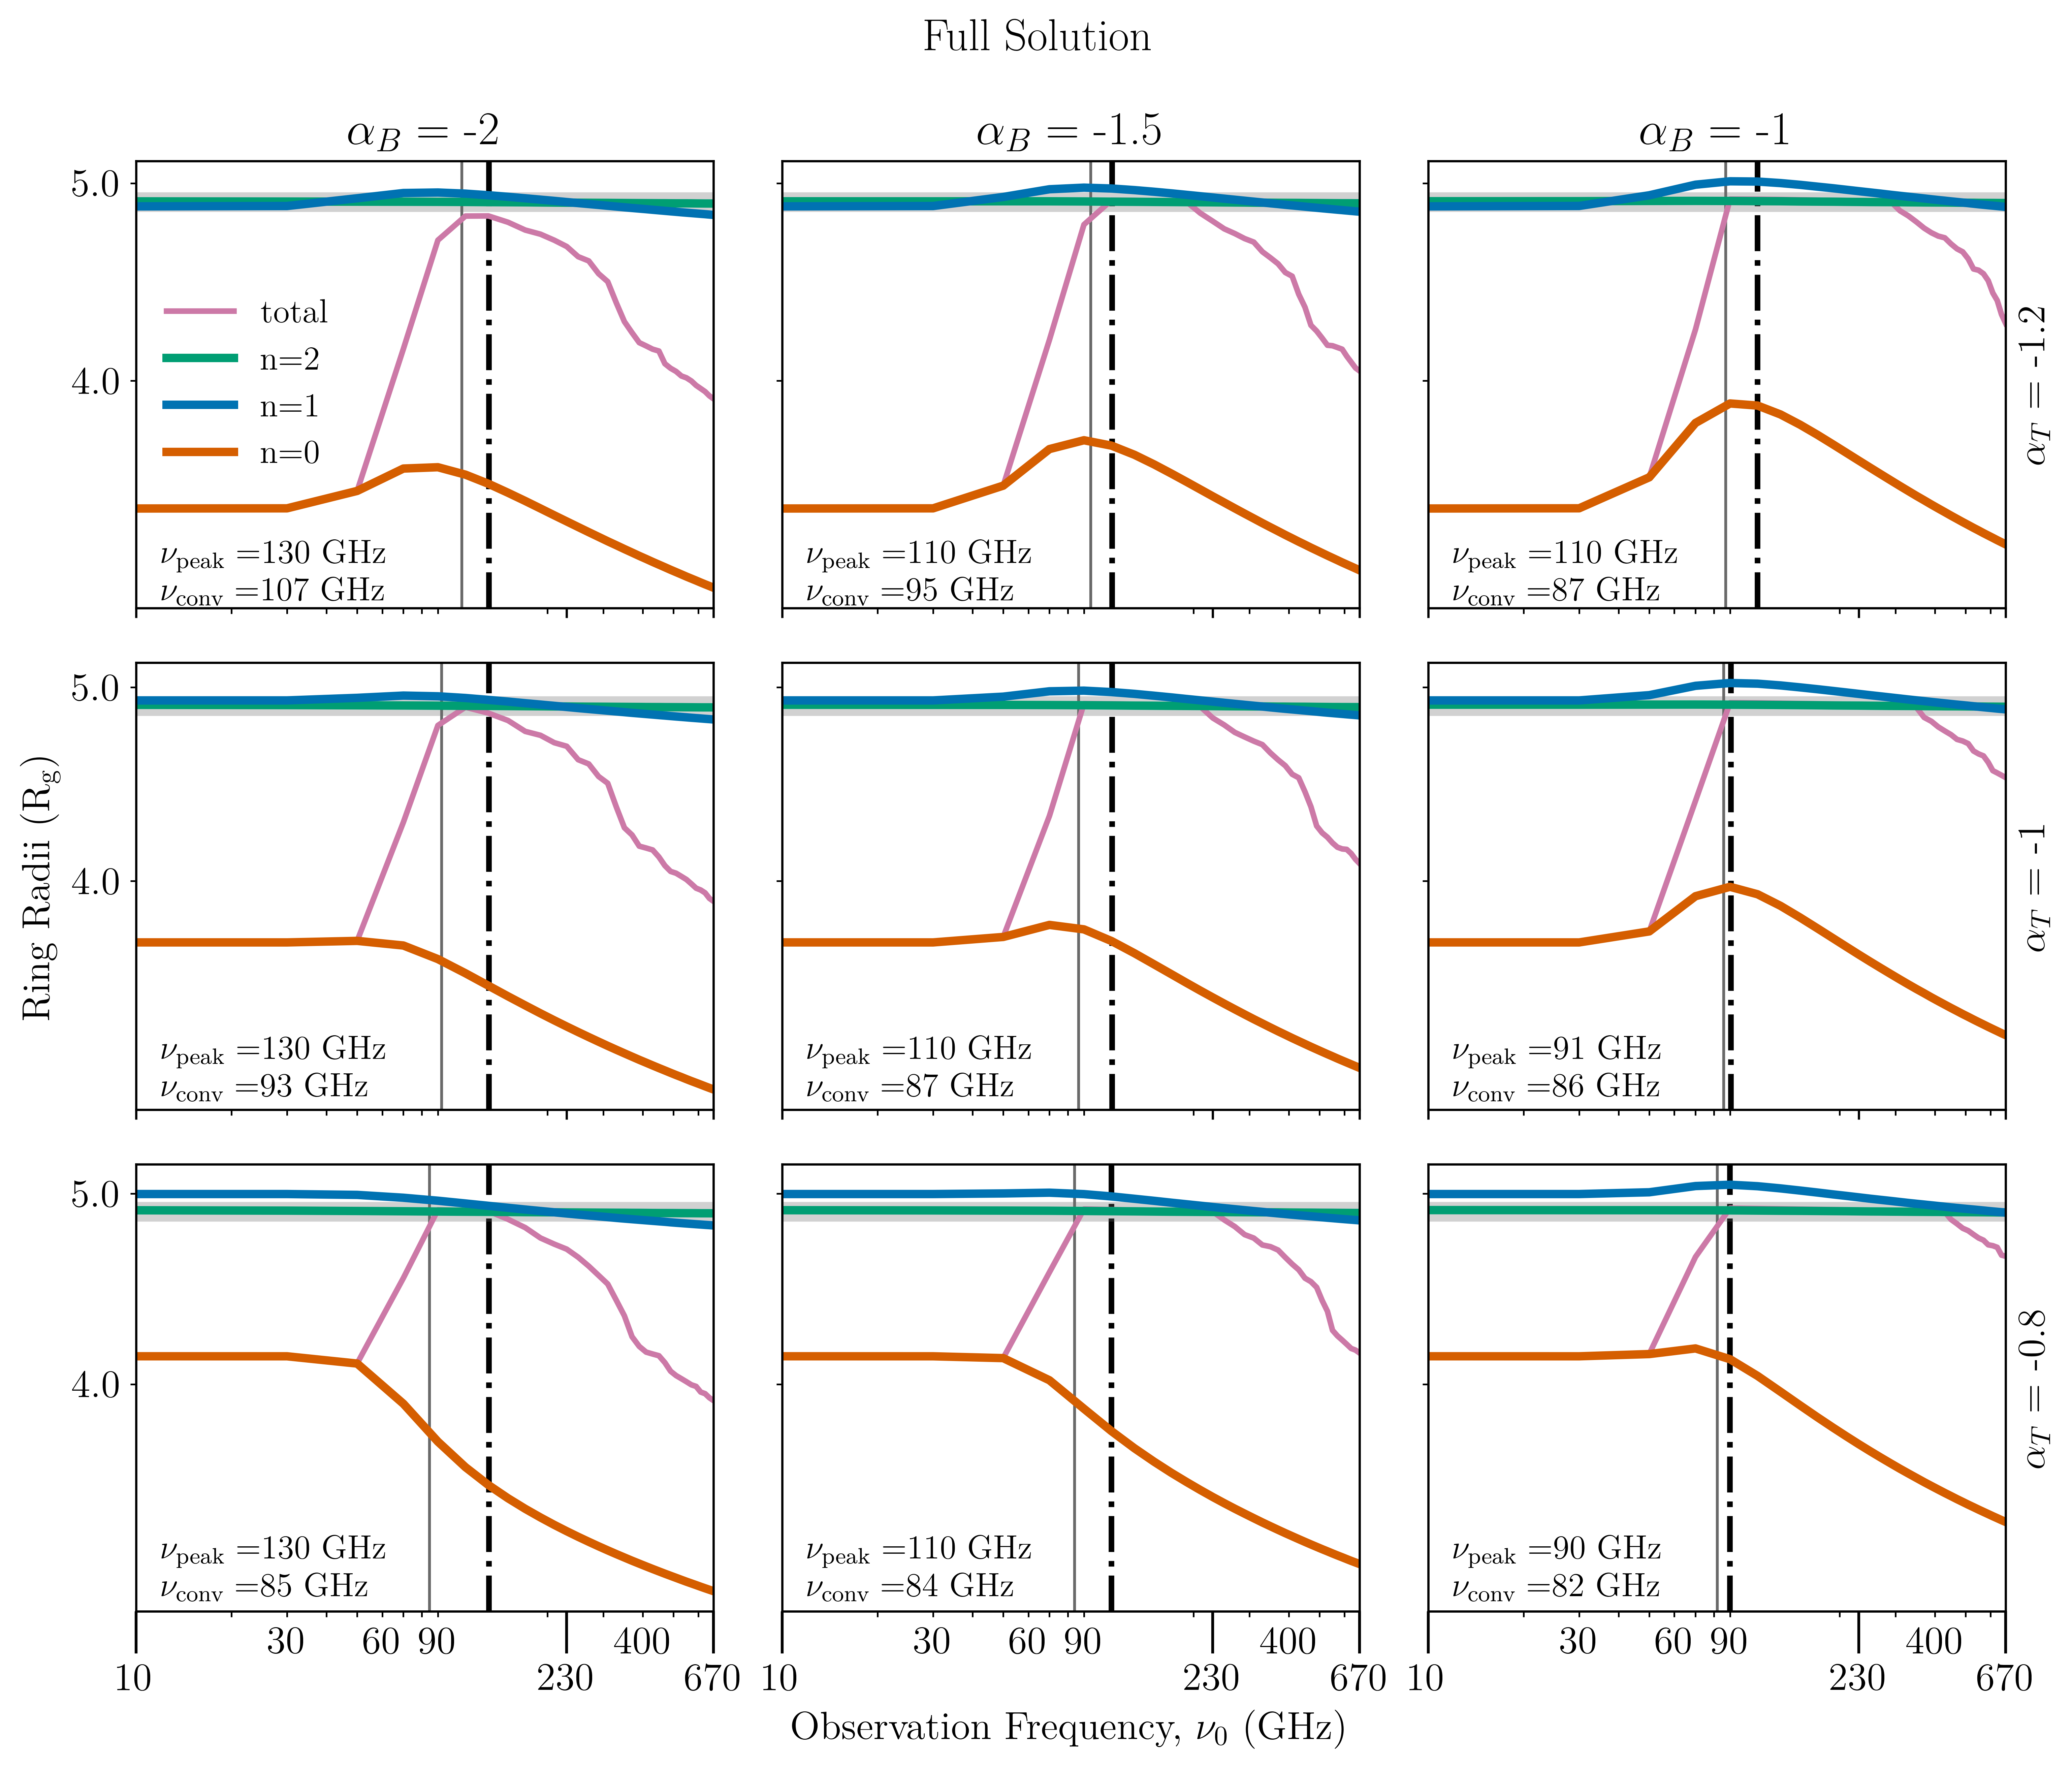

In [72]:

fig, ax = plt.subplots(3, 3, figsize=[10,8], dpi=600,sharex="col",sharey="row")
fig.suptitle('Full Solution', fontsize=16,y=1.03)
ax = np.array([[None, None, None],[None, None, None],[None, None, None]])
fig.tight_layout(pad=.5)

ploty = [1,4,7]
plotx = [7,8,9]

alphaBlabel = [1,2,3]
alphaTlabel = [3,6,9]

k = 1
for i in range(3):
    for j in range(3):
        
#         conv_1 = action["start"] + action["step"] * ilp.ring_convergance(mean_radii_Thick[i,j][:, 2], mean_radii_Thick[i,j][:, 3],3)
#         conv_1 = conv_1 / astroModels.scale_label[action['var']]
        
#         flux_peak_thick = action["start"] + action["step"] * np.argmax(janksys_thick[i,j][:, 3])
#         flux_peak_thick = flux_peak_thick / astroModels.scale_label[action['var']]

        

        ax[i,j] = plt.subplot(3,3,k)
        radiiVersusFreq(ax[i,j],
                        bigRun2[2,i,j]['np']['xvar']() / 1e9,
                        bigRun2[2,i,j]['np']['radVnu_thick'](),
                        bigRun2[2,i,j]['conv']/1e9,
                        bigRun2[2,i,j]['flux_peak'](3)/1e9,
                        r_outer
                       )
        if k == 4:
            ax[i,j].set_ylabel("Ring Radii ({})".format(R'$\rm R_g$'))
        
        text = R"$\nu_{\rm peak}=$" + str("{:.0f}".format(bigRun2[2,i,j]['flux_peak'](3)/1e9)) + ' ' + astroModels.units_label["nu0"] +"\n" + R" $\nu_{\rm conv}=$" + str("{:.0f}".format(bigRun2[2,i,j]['conv']/1e9)) + ' ' + astroModels.units_label["nu0"]
        props = dict(boxstyle='round', facecolor='white', alpha=0.5)
        
        if k == 1:
            ax[i,j].legend(frameon=False)
            # ax[i,j].text(12, 4.45, text , fontsize=12, color="k",bbox=props)

        ax[i,j].text(12, 3.12, text , fontsize=12, color="k")
            



        
        if k == 8:
            ax[i,j].set_xlabel(R"Observation Frequency, $\nu_0$ (GHz)")
            
        if k in ploty:
            ax[i,j].tick_params('y', which="both", labelleft=True)
        
        if k in plotx:
            ax[i,j].tick_params('x', which="both", labelbottom=True)
            n = 3  # Keeps every 4th label
            [l.set_visible(False) for (i, l) in enumerate(ax[i,j].xaxis.get_minorticklabels()) if i % n != 0]
            ax[i,j].tick_params('x', 
                  length=xTickParams["length"], 
                  width=xTickParams["width"], 
                  which=xTickParams["which"], 
                  labelrotation=xTickParams["labelrotation"])
            
        if k in alphaBlabel:
            ax[i,j].title.set_text(R'$\alpha_B=$ ' + str(bigRun2[2,i,j]['bp']["p_mag"]))
            
        if k in alphaTlabel:
            ax[i,j].set_ylabel(R'$\alpha_T=$ ' + str(bigRun2[2,i,j]['bp']["p_temp"]))
            ax[i,j].yaxis.set_label_position('right')

        k += 1
        
# plt.savefig(fig_home + "ThickRadiiVNuGrid",dpi=600,bbox_inches='tight')

# Optical Depth

In [76]:
def optical_Depth(
    ax,
    xaxis,
    total_optical_depth,
    fiducial_model,
    conv_1=None,
    flux_peak_thick=None
):
    
    ax.axvline(conv_1,
               color=conv_1_style["color"], linestyle=conv_1_style["linestyle"], linewidth=conv_1_style["linewidth"])
    
    
#     ax.axvline(flux_peak_thick, color=flux_peak_style["color"],
#                linestyle=flux_peak_style["linestyle"], linewidth=flux_peak_style["linewidth"])
    
    i = 0
    ax.plot(xaxis, 
            total_optical_depth,
            '-', 
            label=RingStyle["label"][i],
            color=RingStyle["color"][i], 
            linewidth=RingStyle["linewidth"][i]
           )
        
    ax.plot(xaxis, 
            fiducial_model,
            '-', 
            color=RingStyle["color"][i], 
            linewidth=RingStyle["linewidth"][i],
            alpha=.3
           )
    
#     for i in range(3):
#         ax.plot(xaxis, 
#                 mean_optical_depth[i],
#                 '-', 
#                 label=RingStyle["label"][i],
#                 color=RingStyle["color"][i], 
#                 linewidth=RingStyle["linewidth"][i]
#                )
        
#     for i in range(3):
#         ax.plot(xaxis, 
#                 fiducial_model[i],
#                 '-', 
#                 color=RingStyle["color"][i], 
#                 linewidth=RingStyle["linewidth"][i],
#                 alpha=.3
#                )


    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.axhline(
        1,
        linestyle='-',
        color='k',
        alpha=.3
    )
    ax.xaxis.set_minor_formatter(ticker.FormatStrFormatter('%.0f'))
    ax.xaxis.set_major_formatter(ticker.FormatStrFormatter("%.0f"))
    # ax.yaxis.set_minor_formatter(ticker.FormatStrFormatter('%.2f'))
    # ax.yaxis.set_major_formatter(ticker.FormatStrFormatter("%.2f"))

    if flux_peak_thick is not None:
        if np.abs(conv_1 - flux_peak_thick) > 35:
            new_ticks = [xaxis[0], 230, conv_1, flux_peak_thick, xaxis[xaxis.size - 1]]
        else:
            new_ticks = [xaxis[0], 230, flux_peak_thick, xaxis[xaxis.size - 1]]
    else:
        new_ticks = [xaxis[0], 230, xaxis[xaxis.size - 1]]
    ax.set_xticks(new_ticks)
    n = 6
    [l.set_visible(False) for (i, l) in enumerate(ax.xaxis.get_minorticklabels()) if i % n != 0]
    
    ax.set_xlim(xaxis[0], xaxis[xaxis.size - 1])



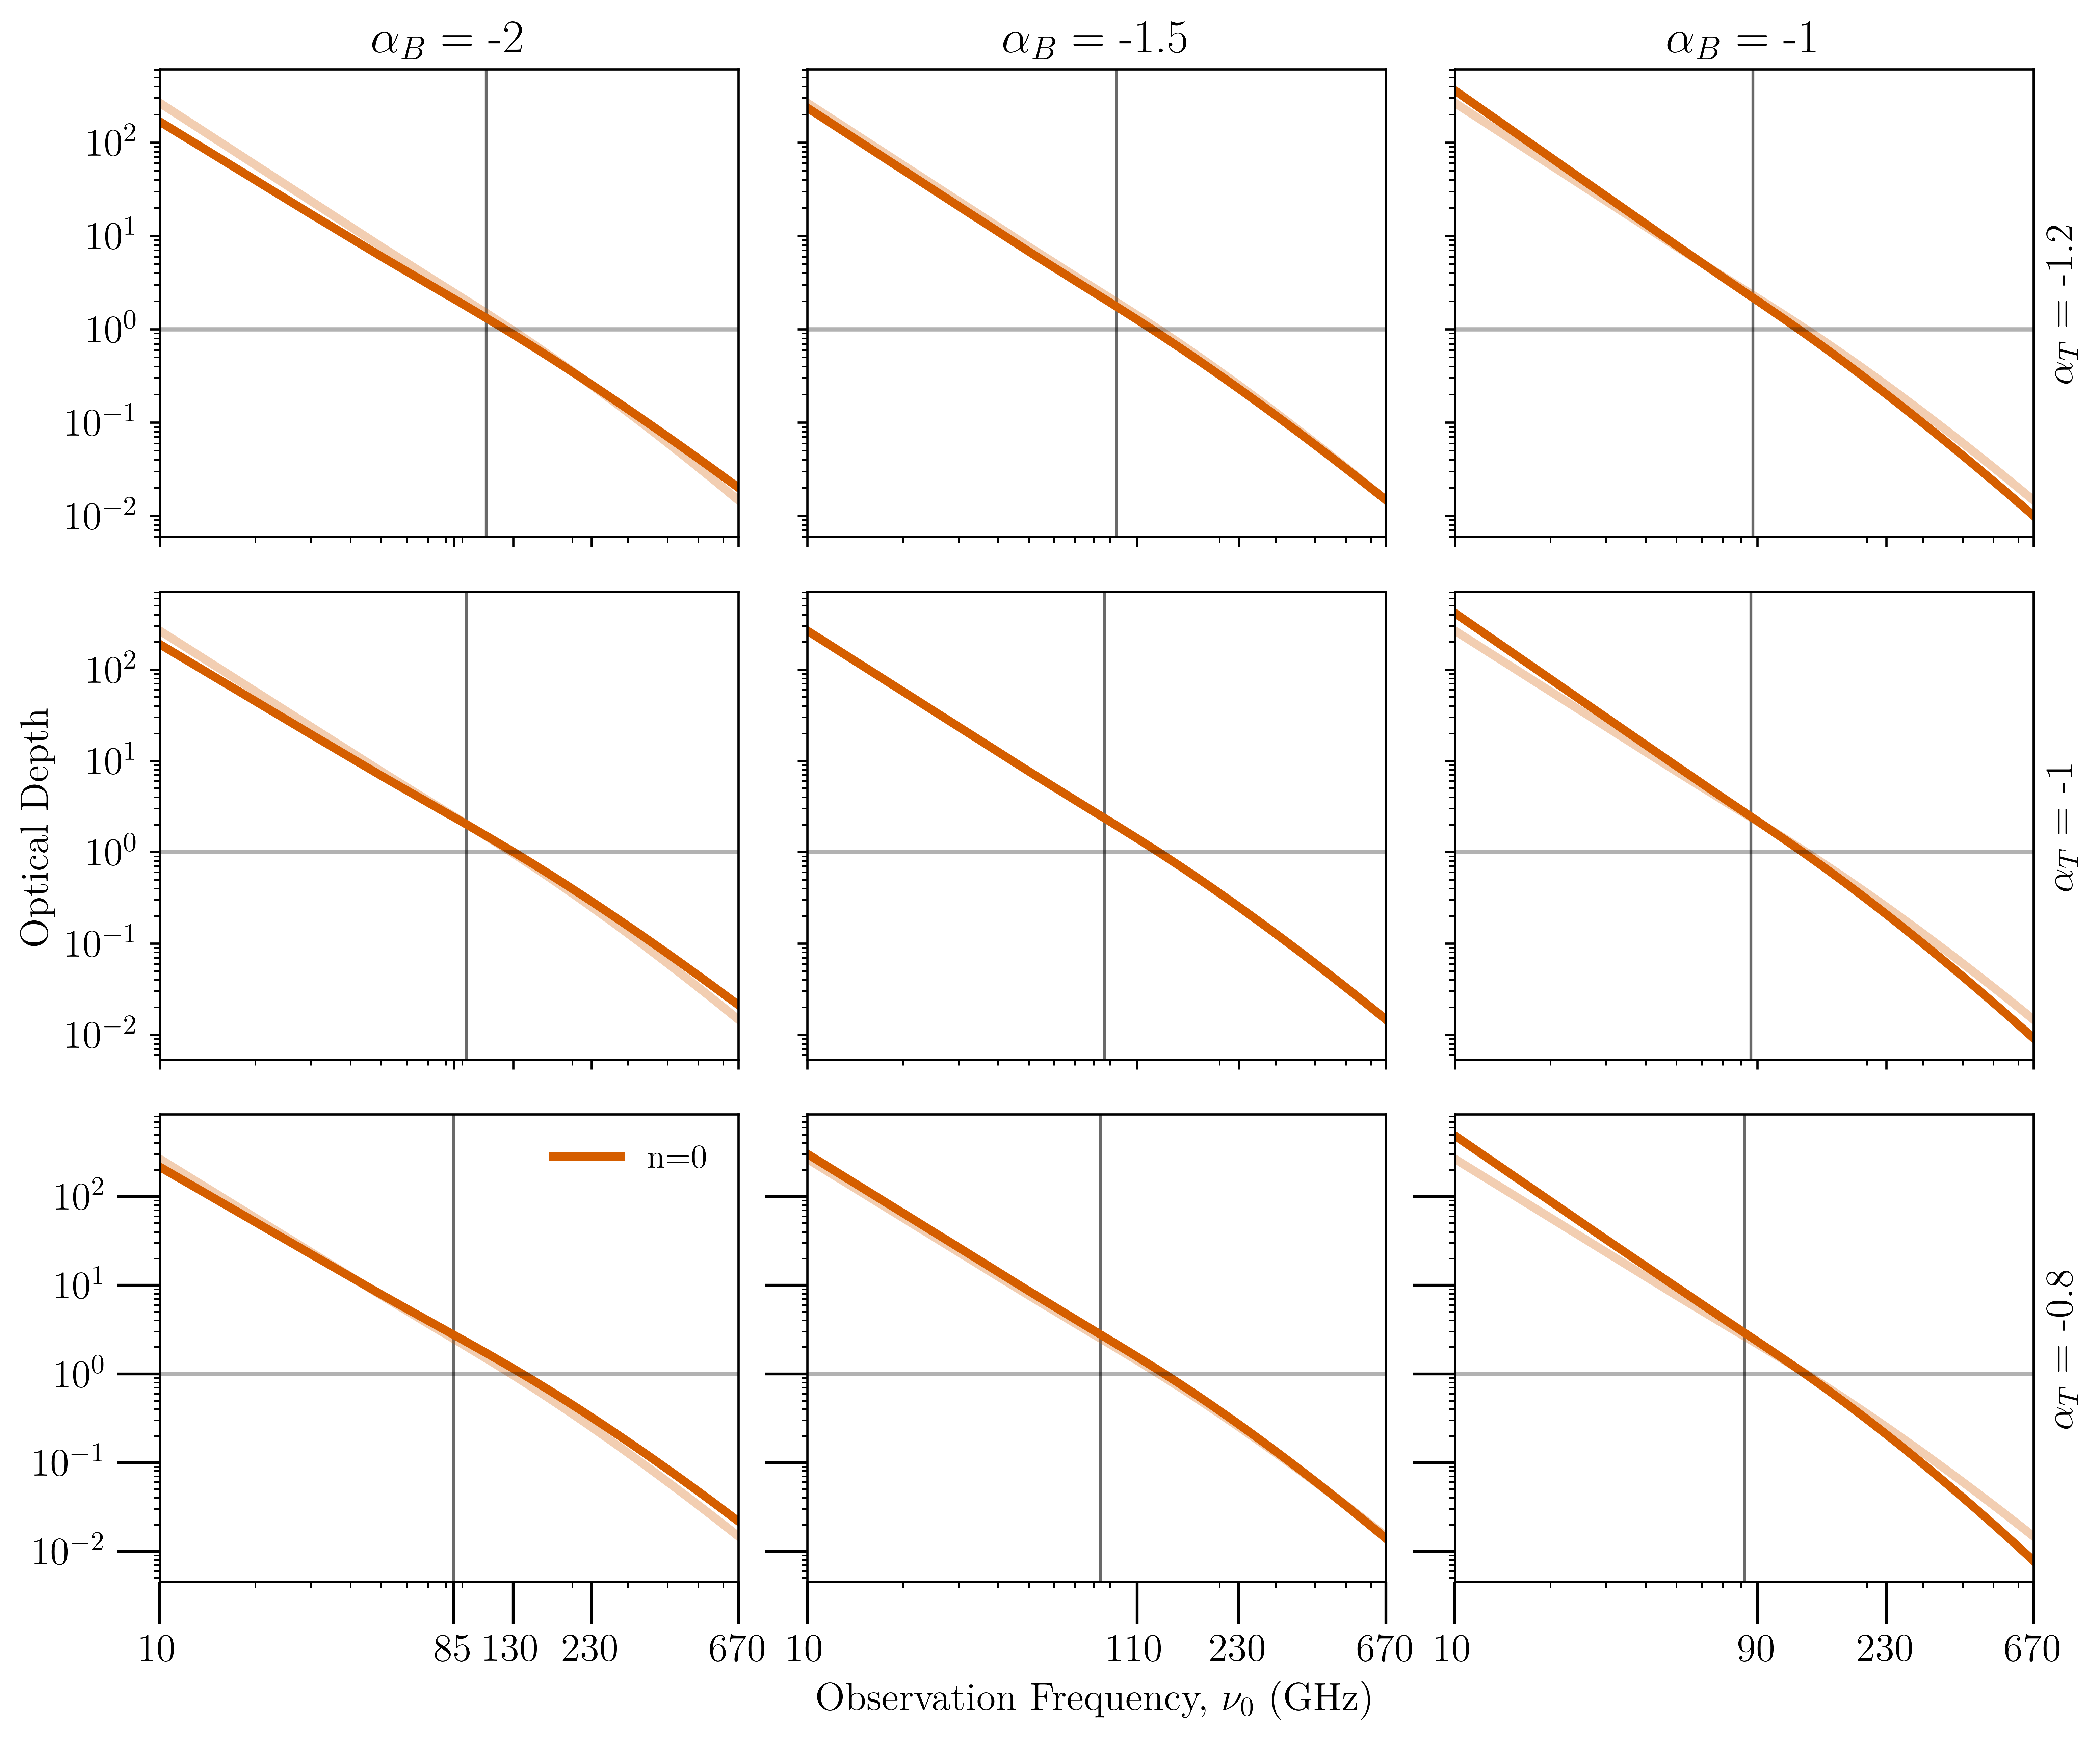

In [79]:
# fig, ax = plt.subplots(1, 1, figsize=[10,8], dpi=600,sharex="col",sharey="row")
# fig.suptitle('', fontsize=16,y=1.03)


fig, ax = plt.subplots(3, 3, figsize=[10,8], dpi=600,sharex="col",sharey="row")
ax = np.array([[None, None, None],[None, None, None],[None, None, None]])
fig.tight_layout(pad=.5)

ploty = [1,4,7]
plotx = [7,8,9]

alphaBlabel = [1,2,3]
alphaTlabel = [3,6,9]


fiducial_model=bigRun2[2,1,1]['np']['tauT']()


k = 1
for i in range(3):
    for j in range(3):
#         poi = {
#             "r_outer": r_outer,
#             "flux_peak_thin": flux_peak_thin,
#             "flux_peak_thick":flux_peak_thick,
#             "conv_1": conv_1,
#         }
#         conv_1 = action["start"] + action["step"] * ilp.ring_convergance(mean_radii_Thick[i,j][:, 2], mean_radii_Thick[i,j][:, 3],3)
#         conv_1 = conv_1 / astroModels.scale_label[action['var']]


#         flux_peak_thick = action["start"] + action["step"] * np.argmax(janksys_thick[i,j][:, 3])
#         flux_peak_thick = flux_peak_thick / astroModels.scale_label[action['var']]


        ax[i,j] = plt.subplot(3,3,k)
        optical_Depth(
            ax[i,j],
            bigRun2[2,i,j]['np']['xvar']() / 1e9,
            bigRun2[2,i,j]['np']['tauT'](),
            fiducial_model,
            bigRun2[2,i,j]['conv']/1e9,
            bigRun2[2,i,j]['flux_peak'](3)/1e9
        )
        if k == 4:
            ax[i,j].set_ylabel("Optical Depth")
            
        if k == 7:
            ax[i,j].legend(frameon=False)
        
        if k == 8:
            ax[i,j].set_xlabel(R"Observation Frequency, $\nu_0$ (GHz)")
            
        if k in ploty:
            ax[i,j].tick_params('y', which="both", labelleft=True)
        
        if k in plotx:
            n = 6  # Keeps every 4th label
            [l.set_visible(False) for (i, l) in enumerate(ax[i,j].xaxis.get_minorticklabels()) if i % n != 0]
            ax[i,j].tick_params('both', 
                  length=xTickParams["length"], 
                  width=xTickParams["width"], 
                  which=xTickParams["which"], 
                  labelrotation=xTickParams["labelrotation"])
            
        if k in alphaBlabel:
            ax[i,j].title.set_text(R'$\alpha_B=$ ' + str(bigRun2[2,i,j]['bp']["p_mag"]))
            
        if k in alphaTlabel:
            ax[i,j].set_ylabel(R'$\alpha_T=$ ' + str(bigRun2[2,i,j]['bp']["p_temp"]))
            ax[i,j].yaxis.set_label_position('right')
        
        k += 1
# plt.savefig(fig_home + "OpticalDepthHighSpin",dpi=600,bbox_inches='tight')


In [81]:
bigRun2[2,i,j]['image'](230e9)

'/scratch/gpfs/td6241/aart/bigRuns/run2/Data/intensity/ModelC33/clean/nu0_2.30000e+11'

# Full Image

In [82]:
def fullImage(ax,Absorbtion_Image,limit):
    vmax0 = np.nanmax(Absorbtion_Image)
        
    im = ax.imshow(Absorbtion_Image, vmax=vmax0, origin="lower", cmap="afmhot", extent=[-limit, limit, -limit, limit])


    ax.set_xlim(-10, 10)  # units of M
    ax.set_ylim(-10, 10)
    



    




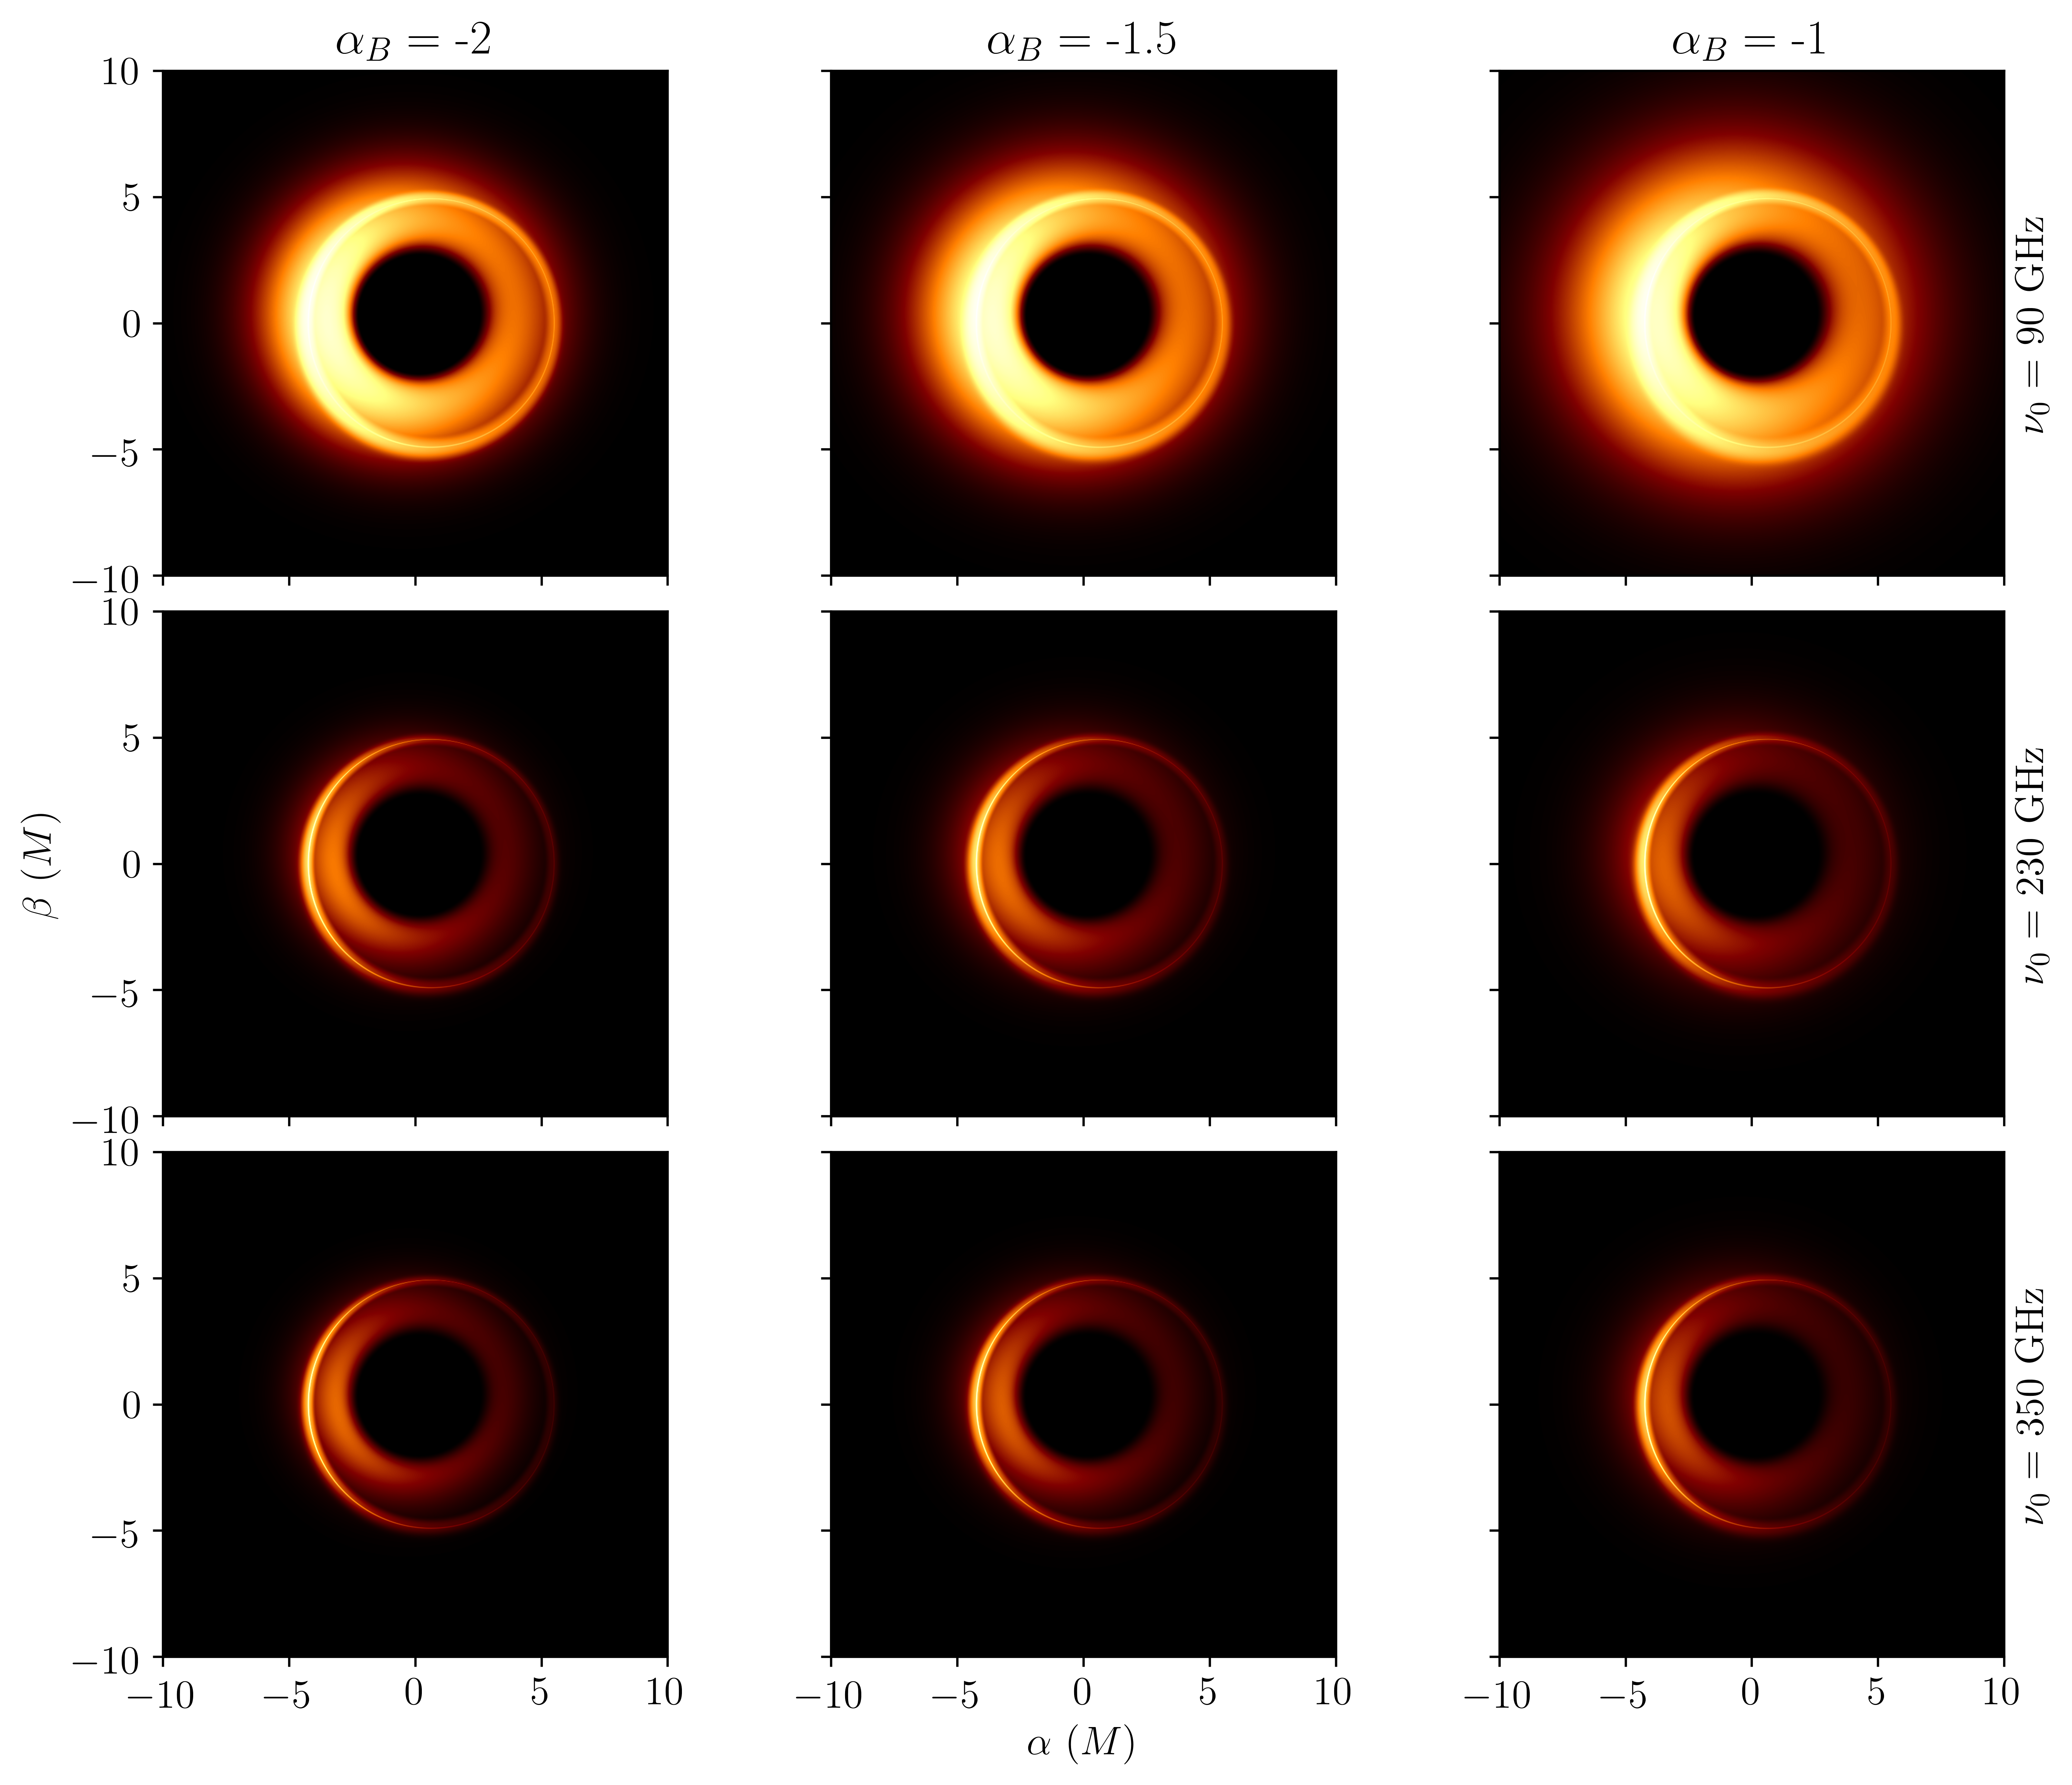

In [87]:
fig, ax = plt.subplots(3, 3, figsize=[10,8], dpi=600,sharex="col",sharey="row")
ax = np.array([[None, None, None],[None, None, None],[None, None, None]])
# thin_image = model_list[i,j]
fig.tight_layout(pad=0)
frequency = [90e9,230e9,350e9]

alphaBlabel = [1,2,3]
freq_label = [3,6,9]


k = 1
for i in range(3):
    current_freq = frequency[i]
    for j in range(3):
        filename = bigRun2[2,1,j]['image'](current_freq)
        
        h5f = h5py.File(filename, 'r')
        Absorbtion_Image = h5f['bghts_full_absorbtion'][:]
        h5f.close()
        
        
        ax[i,j] = plt.subplot(3,3,k)
        fullImage(
            ax[i,j],
            Absorbtion_Image,
            lim0)
        

        
        if k == 4:
            ax[i,j].set_ylabel(r"$\beta$" + " " + r"($M$)")

        if k == 8:
            ax[i,j].set_xlabel(r"$\alpha$" + " " + r"($M$)")
            
                    
        if k in alphaBlabel:
            ax[i,j].title.set_text(R'$\alpha_B=$ ' + str(bigRun2[2,1,j]['bp']["p_mag"]))
            
        if k in freq_label:
            ax[i,j].set_ylabel(R'$\nu_0=$ ' + "{:.0f}".format(current_freq / astroModels.scale_label[action["var"]]) + ' ' + astroModels.units_label[action["var"]])
            ax[i,j].yaxis.set_label_position('right')

        k += 1
    
        
            


        
        
    # ax.title.set_text('Optically Thin Assumption')
    # ax.text(-9, 8.5, astroModels.var_label[action["var"]]
    #      + str(round(frequency / astroModels.scale_label[action["var"]], 2))
    #      + ' ' + astroModels.units_label[action["var"]], fontsize=12, color="w")

# plt.savefig(fig_home + "FullThickImages",dpi=600,bbox_inches='tight')

In [ ]:
fig, ax = plt.subplots(3, 3, figsize=[10,8], dpi=600,sharex="col",sharey="row")
ax = np.array([[None, None, None],[None, None, None],[None, None, None]])
# thin_image = model_list[i,j]
fig.tight_layout(pad=0)
frequency = [90e9,230e9,350e9]
spins = ["0","0.5","15/16"]
alphaBlabel = [1,2,3]
freq_label = [3,6,9]

k = 1
for i in range(3):
    current_freq = frequency[i]
    for j in range(3):
        filename = bigRun2[j,1,1]['image'](current_freq)
        
        h5f = h5py.File(filename, 'r')
        Absorbtion_Image = h5f['bghts_full_absorbtion'][:]
        h5f.close()
        
        
        ax[i,j] = plt.subplot(3,3,k)
        fullImage(
            ax[i,j],
            Absorbtion_Image,
            lim0)
        

        
        if k == 4:
            ax[i,j].set_ylabel(r"$\beta$" + " " + r"($M$)")

        if k == 8:
            ax[i,j].set_xlabel(r"$\alpha$" + " " + r"($M$)")
            
                    
        if k in alphaBlabel:
            ax[i,j].title.set_text(R'$a=$ ' + spins[j])
            
        if k in freq_label:
            ax[i,j].set_ylabel(R'$\nu_0=$ ' + "{:.0f}".format(current_freq / astroModels.scale_label[action["var"]]) + ' ' + astroModels.units_label[action["var"]])
            ax[i,j].yaxis.set_label_position('right')

        k += 1
    
        
            


        
        
    # ax.title.set_text('Optically Thin Assumption')
    # ax.text(-9, 8.5, astroModels.var_label[action["var"]]
    #      + str(round(frequency / astroModels.scale_label[action["var"]], 2))
#     #      + ' ' + astroModels.units_label[action["var"]], fontsize=12, color="w")

# plt.savefig(fig_home + "SpinFullThickImages",dpi=600,bbox_inches='tight')